In [1]:
from datetime import datetime, date
from dateutil.relativedelta import relativedelta
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
pd.options.display.max_columns = None
warnings.filterwarnings('ignore')


In [2]:
%store -r recent_sales

In [3]:
recent_sales.shape

(33508, 10)

In [4]:
recent_sales.head()

,Address,Suburb,Beds,Baths,Carpark,Type,Size,By,Price,Date
2,2 Lillyana St,Schofields Nsw 2762,4.0,3.0,1.0,House,500.2,Private Sale,1065000,2022-02-15
1,33/24 Walker St,Rhodes Nsw 2138,2.0,2.0,1.0,Apartment,0.0,Private Sale,801000,2022-02-15
4,7/1 Fewings St,Clovelly Nsw 2031,2.0,2.0,1.0,Townhouse,0.0,Auction,1520000,2022-02-15
5,127/25 Best St,Lane Cove Nsw 2066,3.0,1.0,1.0,Apartment,0.0,Private Sale,1450000,2022-02-15
0,4/97 The Blvde,Wiley Park Nsw 2195,2.0,1.0,1.0,Apartment,0.0,Private Sale,462000,2022-02-15


In [5]:
recent_sales['Price'] = recent_sales['Price'].astype(int)

## Budget, Bedrooms, Bathrooms, Time Period

In [6]:
# Budget

wan_min = 65
wan_max = 100
'''
it's a chinese numeric thing.
Unlike in English speaking countries where people count numbers in 3: 1 million is 1,000,000 ,
Chinese devide numbers in 4 digits: 1 million is 100,0000
1"wan" means 10000, or 10K. 1 million is 100 "wan"
'''
budget_max = wan_max*10000
budget_min = wan_min*10000

# Beds, Baths

beds = 2
baths = 2

# Time Period

last_months = 12

d_date = date.today() + relativedelta(months= -last_months)  # within 12 months
d_date = d_date.strftime("%m/%d/%y")


In [7]:
properties = recent_sales[
    (recent_sales["Price"] >= budget_min) &
    (recent_sales["Price"] <= budget_max) &
    (recent_sales["Beds"] >= beds) &
    (recent_sales["Baths"] >= baths) &
    (recent_sales["Date"] >= d_date)
]


## Target Suburbs

In [8]:
hot_threshold = 25

suburbs = properties.Suburb.unique()
print("all suburbs in the dataframe:" ,len(suburbs))

grp_suburbs = properties.groupby(["Suburb"]).size()
hot_suburbs=grp_suburbs[grp_suburbs>hot_threshold]
print("hot suburbs:", len(hot_suburbs))

all suburbs in the dataframe: 495
hot suburbs: 42


In [9]:
# use this if specific suburbs


# places = [
#     'Ryde Nsw 2112',
#     'Ryde Nsw 2112',
#     'West Ryde Nsw 2114',
#     'North Ryde',
#     'Macquarie Park',
#     'Eastwood',
#     'Meadowbank',
#     'Rhodes Nsw 2138',
#     'Castle Hill Nsw',
#     'Waitara',
#     'Hornsby',
#     'Zetland Nsw 2017',
# ]



places = hot_suburbs.index


In [10]:
selected = []
for place in places:
    selected.append(place)

In [11]:
remove_list = ['Blacktown Nsw 2148',
               'Bradbury Nsw 2560',
               'Cranebrook Nsw 2749',
               'Glenmore Park Nsw 2745',
               'Ingleburn Nsw 2565',
               'Jordan Springs Nsw 2747',
               'Mount Annan Nsw 2567',
               'Penrith Nsw 2750',
               'Quakers Hill Nsw 2763',
               'Riverstone Nsw 2765',
               'Rooty Hill Nsw 2766',
               'Ropes Crossing Nsw 2760',
               'Schofields Nsw 2762',
               'Spring Farm Nsw 2570',
               'St Clair Nsw 2759',
               'St Marys Nsw 2760',
               'Caringbah Nsw 2229',
               'Greenacre Nsw 2190',
               'Hurstville Nsw 2220',
               'Wolli Creek Nsw 2205',
               'Parramatta Nsw 2150'
               ]


for ele in remove_list:
    selected.remove(ele)

for ele in selected:
    print(ele)


Asquith Nsw 2077
Auburn Nsw 2144
Baulkham Hills Nsw 2153
Burwood Nsw 2134
Campsie Nsw 2194
Carlingford Nsw 2118
Castle Hill Nsw 2154
Casula Nsw 2170
Epping Nsw 2121
Gladesville Nsw 2111
Hornsby Nsw 2077
Lidcombe Nsw 2141
Rhodes Nsw 2138
Rosebery Nsw 2018
Ryde Nsw 2112
Seven Hills Nsw 2147
Toongabbie Nsw 2146
Waitara Nsw 2077
Waterloo Nsw 2017
Wentworth Point Nsw 2127
Zetland Nsw 2017


Asquith Nsw 2077 :
Properties: 32 ( 2+ bedrooms, 2+ bathrooms, budget: < 100 wan within the last, 12 months )


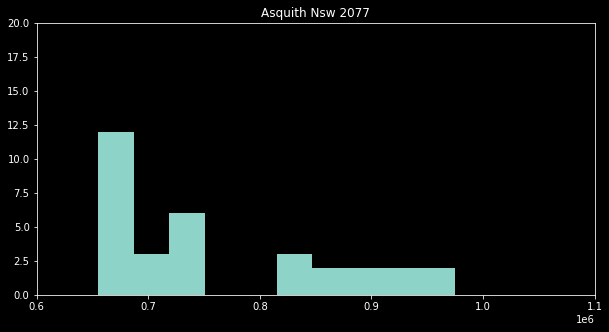

Auburn Nsw 2144 :
Properties: 33 ( 2+ bedrooms, 2+ bathrooms, budget: < 100 wan within the last, 12 months )


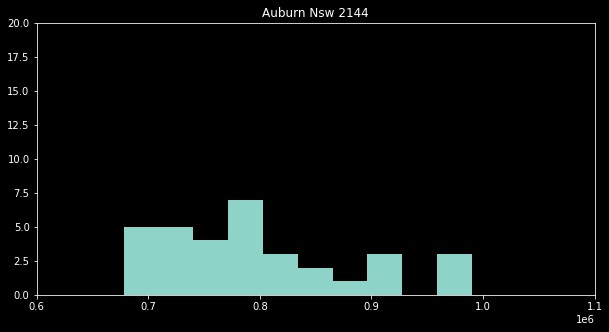

Baulkham Hills Nsw 2153 :
Properties: 47 ( 2+ bedrooms, 2+ bathrooms, budget: < 100 wan within the last, 12 months )


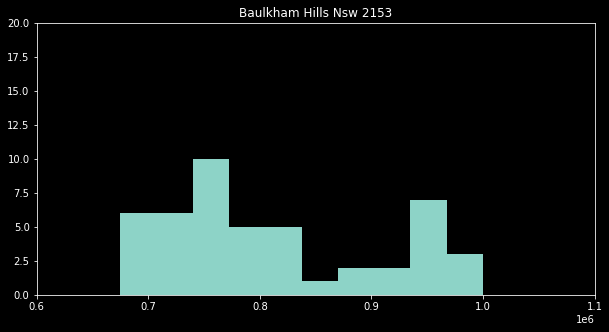

Burwood Nsw 2134 :
Properties: 66 ( 2+ bedrooms, 2+ bathrooms, budget: < 100 wan within the last, 12 months )


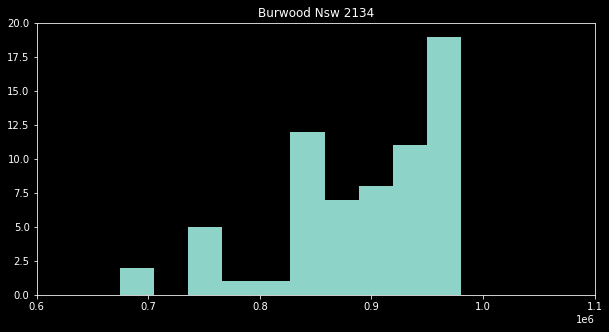

Campsie Nsw 2194 :
Properties: 35 ( 2+ bedrooms, 2+ bathrooms, budget: < 100 wan within the last, 12 months )


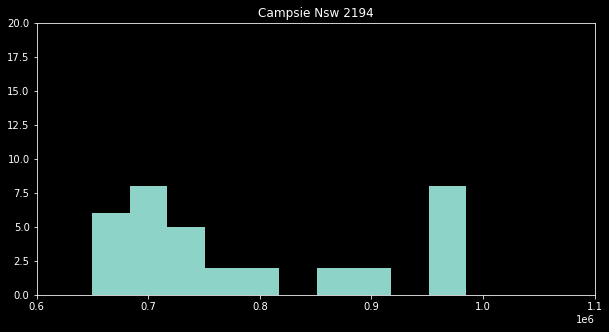

Carlingford Nsw 2118 :
Properties: 42 ( 2+ bedrooms, 2+ bathrooms, budget: < 100 wan within the last, 12 months )


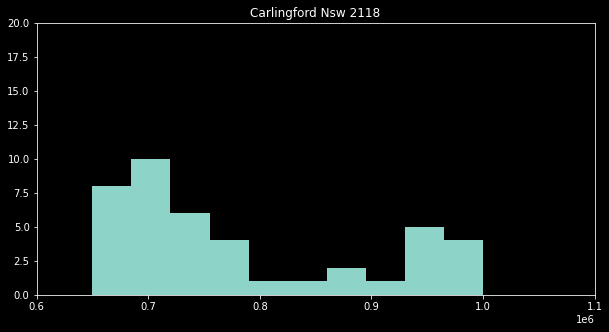

Castle Hill Nsw 2154 :
Properties: 29 ( 2+ bedrooms, 2+ bathrooms, budget: < 100 wan within the last, 12 months )


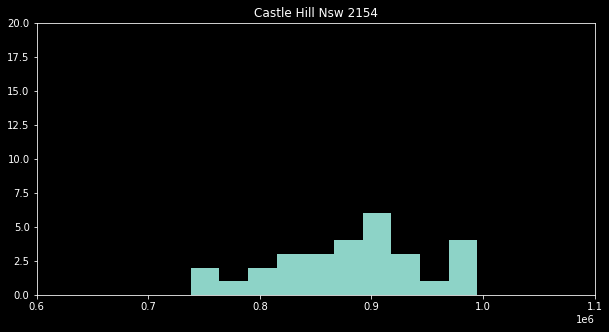

Casula Nsw 2170 :
Properties: 32 ( 2+ bedrooms, 2+ bathrooms, budget: < 100 wan within the last, 12 months )


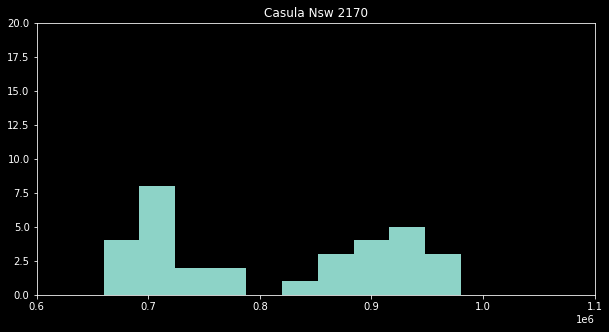

Epping Nsw 2121 :
Properties: 51 ( 2+ bedrooms, 2+ bathrooms, budget: < 100 wan within the last, 12 months )


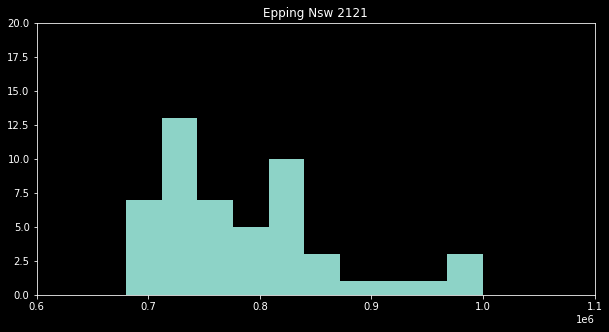

Gladesville Nsw 2111 :
Properties: 26 ( 2+ bedrooms, 2+ bathrooms, budget: < 100 wan within the last, 12 months )


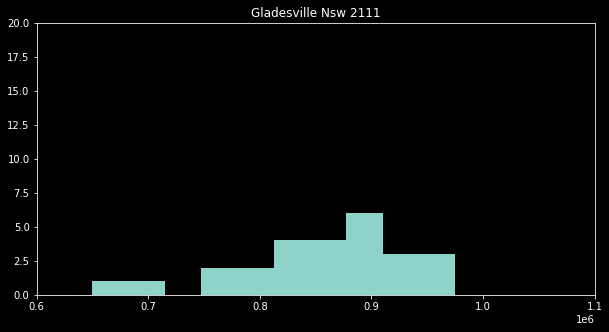

Hornsby Nsw 2077 :
Properties: 55 ( 2+ bedrooms, 2+ bathrooms, budget: < 100 wan within the last, 12 months )


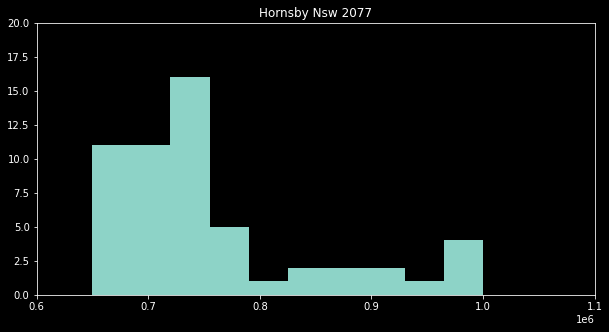

Lidcombe Nsw 2141 :
Properties: 27 ( 2+ bedrooms, 2+ bathrooms, budget: < 100 wan within the last, 12 months )


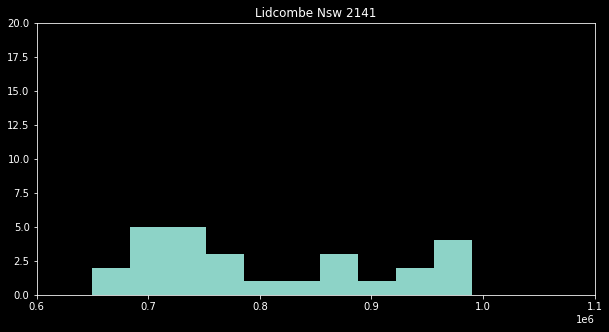

Rhodes Nsw 2138 :
Properties: 41 ( 2+ bedrooms, 2+ bathrooms, budget: < 100 wan within the last, 12 months )


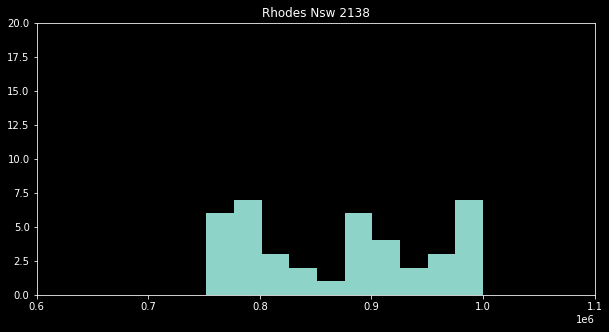

Rosebery Nsw 2018 :
Properties: 35 ( 2+ bedrooms, 2+ bathrooms, budget: < 100 wan within the last, 12 months )


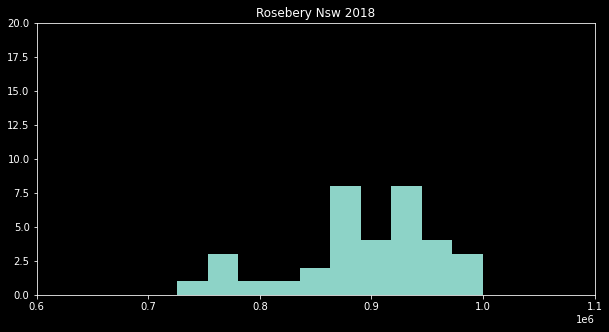

Ryde Nsw 2112 :
Properties: 51 ( 2+ bedrooms, 2+ bathrooms, budget: < 100 wan within the last, 12 months )


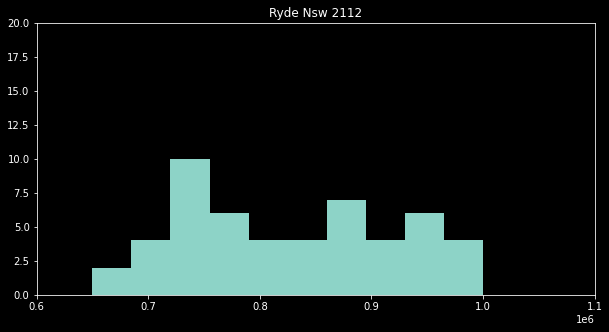

Seven Hills Nsw 2147 :
Properties: 31 ( 2+ bedrooms, 2+ bathrooms, budget: < 100 wan within the last, 12 months )


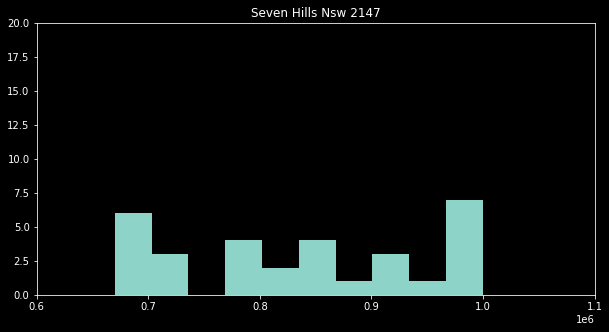

Toongabbie Nsw 2146 :
Properties: 28 ( 2+ bedrooms, 2+ bathrooms, budget: < 100 wan within the last, 12 months )


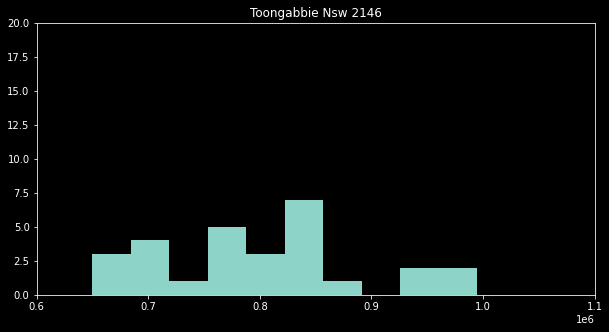

Waitara Nsw 2077 :
Properties: 33 ( 2+ bedrooms, 2+ bathrooms, budget: < 100 wan within the last, 12 months )


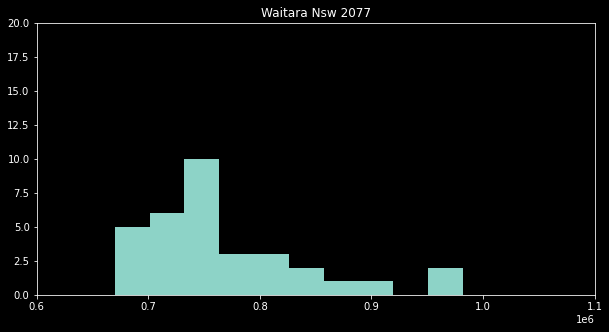

Waterloo Nsw 2017 :
Properties: 39 ( 2+ bedrooms, 2+ bathrooms, budget: < 100 wan within the last, 12 months )


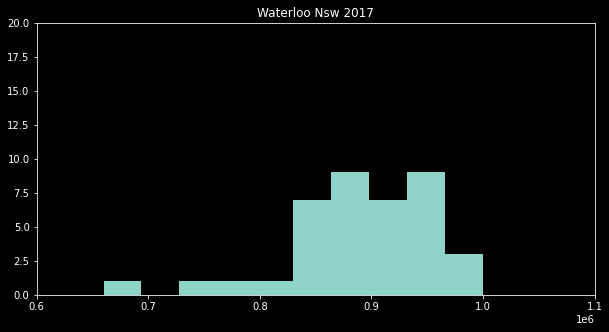

Wentworth Point Nsw 2127 :
Properties: 122 ( 2+ bedrooms, 2+ bathrooms, budget: < 100 wan within the last, 12 months )


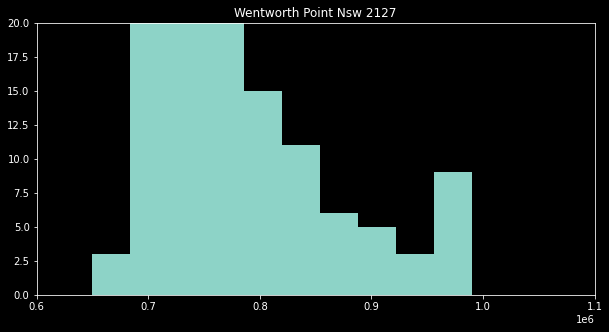

Zetland Nsw 2017 :
Properties: 33 ( 2+ bedrooms, 2+ bathrooms, budget: < 100 wan within the last, 12 months )


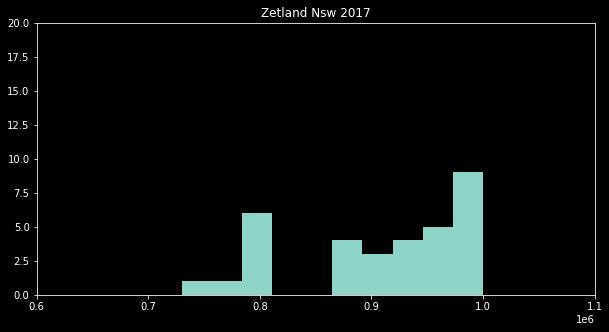

In [12]:
xlim_min = 600000
xlim_max = 1100000
ylim_max = 20

def make_hist(i):
    plt.figure(figsize=(10,5))
    plt.hist(result['Price'])
    plt.title(i)
    plt.xlim(xlim_min,xlim_max)
    plt.ylim(0,ylim_max)
    plt.show()

for ele in selected:
    print(ele,":")
    result = properties[properties['Suburb'].str.contains(ele)]
    # display(result[:1])
    print("Properties:", result.shape[0],"(",str(beds)+"+","bedrooms,",str(baths)+"+","bathrooms,","budget: <",wan_max,"wan", "within the last," ,last_months,"months",")")
    make_hist(ele)

  
    